# **Mall Customer Segmentation Using K-Means Clustering**


## **Submitted by:**  
### Isha Bharadwaj
### Md. Razi Shahid Ansari
### Debashish Sahu
### Ankit Acharya

## Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import warnings   #To avoid warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns



In [56]:
# import all libraries and dependencies for machine learning
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Data Preparation

## Data Loading

In [57]:
mall= pd.read_csv(r"C:/Users/Ankit/Desktop/Skills Lab Project/Customer Segmentation Using K-Means Clustering/Mall_Customers.csv")
mall.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
mall.shape

(200, 5)

In [59]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Duplicate Check

In [61]:
mall_d= mall.copy()
mall_d.drop_duplicates(subset=None,inplace=True)

In [62]:
mall_d.shape

(200, 5)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

# Data Cleaning

Null Percentage: Columns

In [63]:
(mall.isnull().sum() * 100 / len(mall)).value_counts(ascending=False)

0.0    5
dtype: int64

Null Count: Columns

In [64]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Null Percentage: Rows

In [65]:
(mall.isnull().sum(axis=1) * 100 / len(mall)).value_counts(ascending=False)

0.0    200
dtype: int64

Null Count: Rows

In [66]:
mall.isnull().sum(axis=1).value_counts(ascending=False)

0    200
dtype: int64

We found that there are no missing / Null / NaN values either in columns or rows. 

# Exploratory Data Analytics

Univariate Analysis

**Gender**

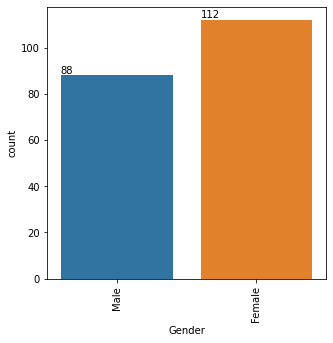

In [67]:
plt.figure(figsize = (5,5))
gender = mall['Gender'].sort_values(ascending = False)
ax = sns.countplot(x='Gender', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

Data is not balanced, 27% more Females have participated  than males 

**Age**

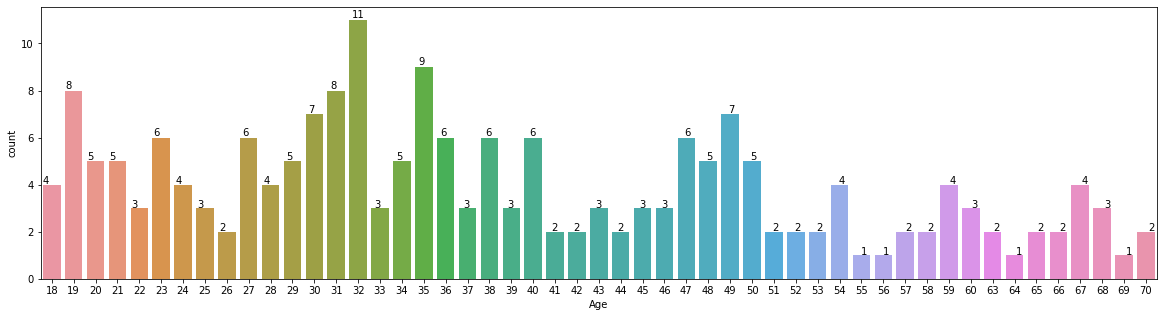

In [68]:
 plt.figure(figsize = (20,5))
gender = mall['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Age 18 to 70

**Annual Income (k$)**

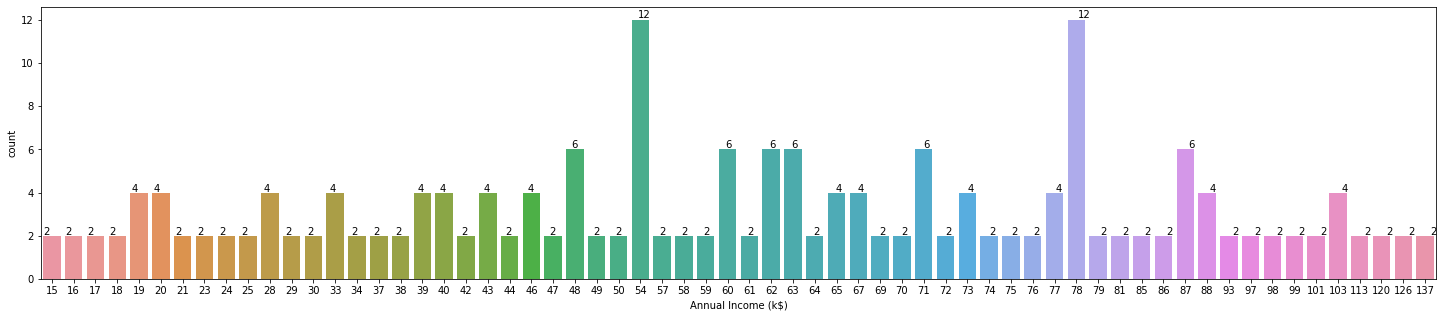

In [69]:
plt.figure(figsize = (25,5))
gender = mall['Annual Income (k$)'].sort_values(ascending = False)
ax = sns.countplot(x='Annual Income (k$)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are from Annual Income(k$) range between 15 to 137

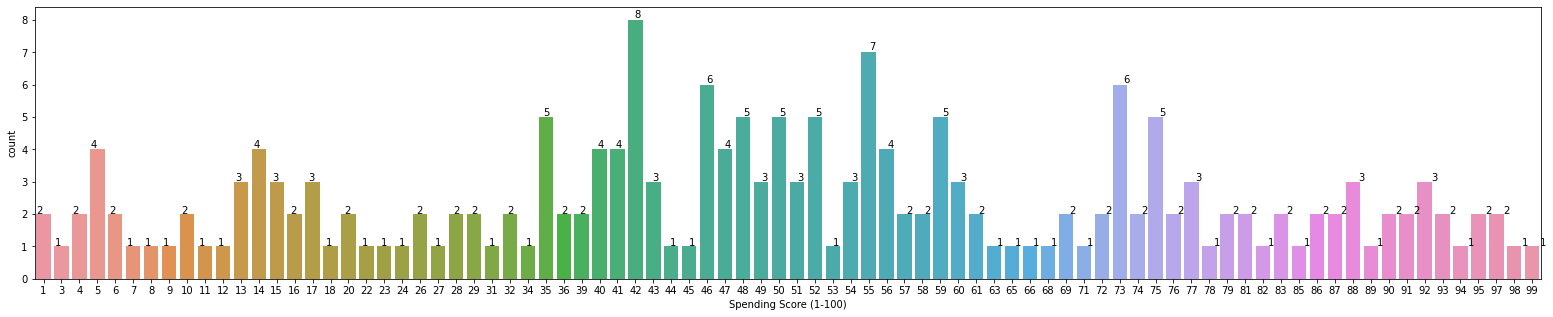

In [70]:
plt.figure(figsize = (27,5))
gender = mall['Spending Score (1-100)'].sort_values(ascending = False)
ax = sns.countplot(x='Spending Score (1-100)', data= mall)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

Audience are having Spending Score (1-100) between 1 to 99 

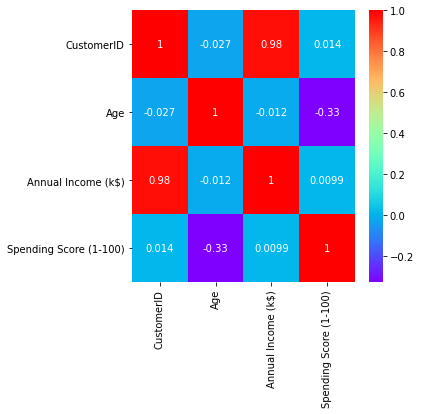

In [71]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (5,5))
sns.heatmap(mall.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

- Age and Spending Score (1-100) are moderately correlated with correlation of -0.33

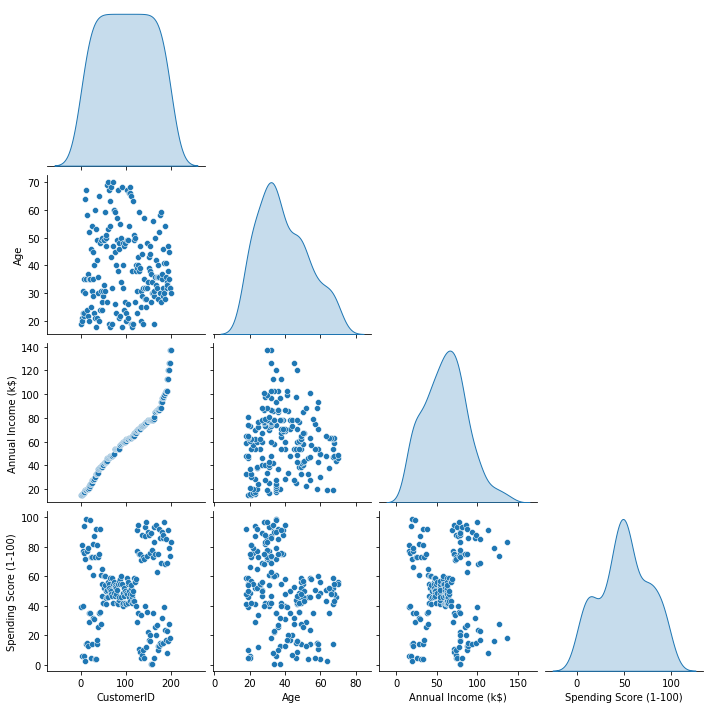

In [72]:
sns.pairplot(mall,corner=True,diag_kind="kde")
plt.show()

## Outlier Analysis

In [73]:
# Data before Outlier Treatment 
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


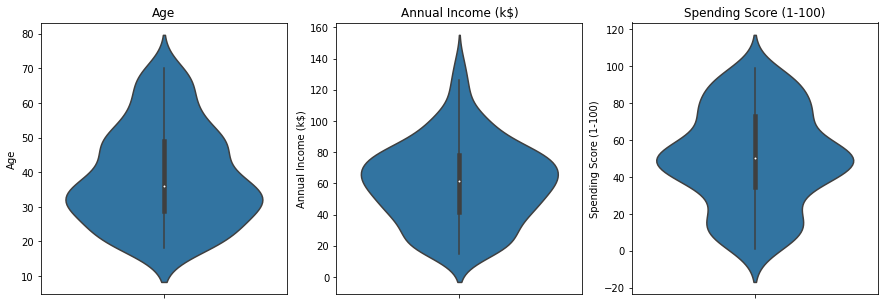

In [74]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=mall.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=mall['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=mall['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()


There is an outlier in Annual Income (k$) field but Age & Spending Score(1-100) has no outliers 

## We use Percentile Capping (Winsorization) for outliers handling

In [75]:
Q3 = mall['Annual Income (k$)'].quantile(0.99)
Q1 = mall['Annual Income (k$)'].quantile(0.01)
mall['Annual Income (k$)'][mall['Annual Income (k$)']<=Q1]=Q1
mall['Annual Income (k$)'][mall['Annual Income (k$)']>=Q3]=Q3

In [76]:
# Data After Outlier Treatment 
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.461000,50.200000
std,57.879185,13.969007,25.949731,25.823522
min,1.000000,18.000000,15.990000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,126.110000,99.000000


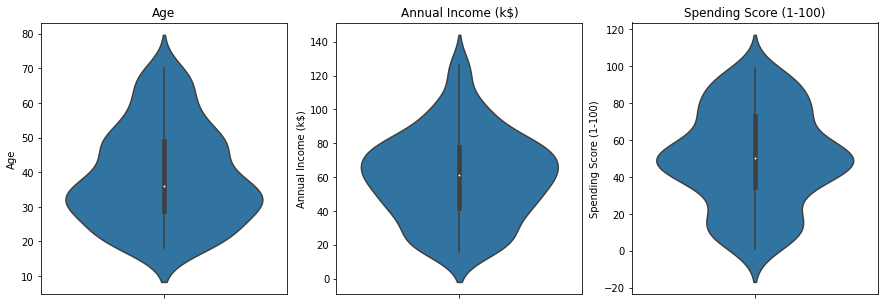

In [77]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=mall.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=mall['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=mall['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()

In [78]:
# Dropping CustomerID,Gender field to form cluster

mall_c = mall.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [79]:
mall.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.99,39
1,21,15.99,81
2,20,16.00,6
3,23,16.00,77
4,31,17.00,40


# Rescaling the Features

Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [80]:
# Standarisation technique for scaling
scaler = StandardScaler()
mall_scaled = scaler.fit_transform(mall)

In [81]:
#mall_scaled

In [82]:
mall_df1 = pd.DataFrame(mall_scaled, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
mall_df1.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.718037,-0.434801
1,-1.281035,-1.718037,1.195704
2,-1.352802,-1.717651,-1.715913
3,-1.137502,-1.717651,1.040418
4,-0.563369,-1.679018,-0.395980


# Model Building

## K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

## Finding the Optimal Number of Clusters

Here we use Elbow Curve to get the right number of Clusters.

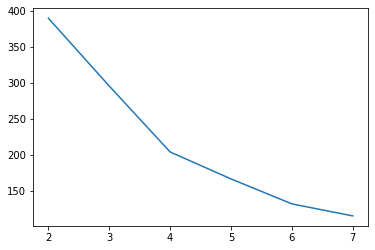

In [83]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(mall_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

Looking at the above elbow curve it looks good to proceed with 4 clusters.

## Silhouette Analysis


In [103]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(mall_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(mall_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3347014339305363
For n_clusters=3, the silhouette score is 0.3559081971282585
For n_clusters=4, the silhouette score is 0.40563383549747967
For n_clusters=5, the silhouette score is 0.4188170491480318
For n_clusters=6, the silhouette score is 0.42921955997454103
For n_clusters=7, the silhouette score is 0.41911347503459057
For n_clusters=8, the silhouette score is 0.4091500293960223


Since values approximate towards ~0.4 will opt for 4 as no. of clusters

In [84]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster.fit(mall_df1)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [85]:
# Cluster labels

cluster.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [86]:
# Assign the label

mall_d['Cluster_Id'] = cluster.labels_
mall_d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [87]:
## Number of customers in each cluster
mall_d['Cluster_Id'].value_counts(ascending=True)

0    38
3    40
1    57
2    65
Name: Cluster_Id, dtype: int64

In [88]:
mall_d.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_Id'],
      dtype='object')

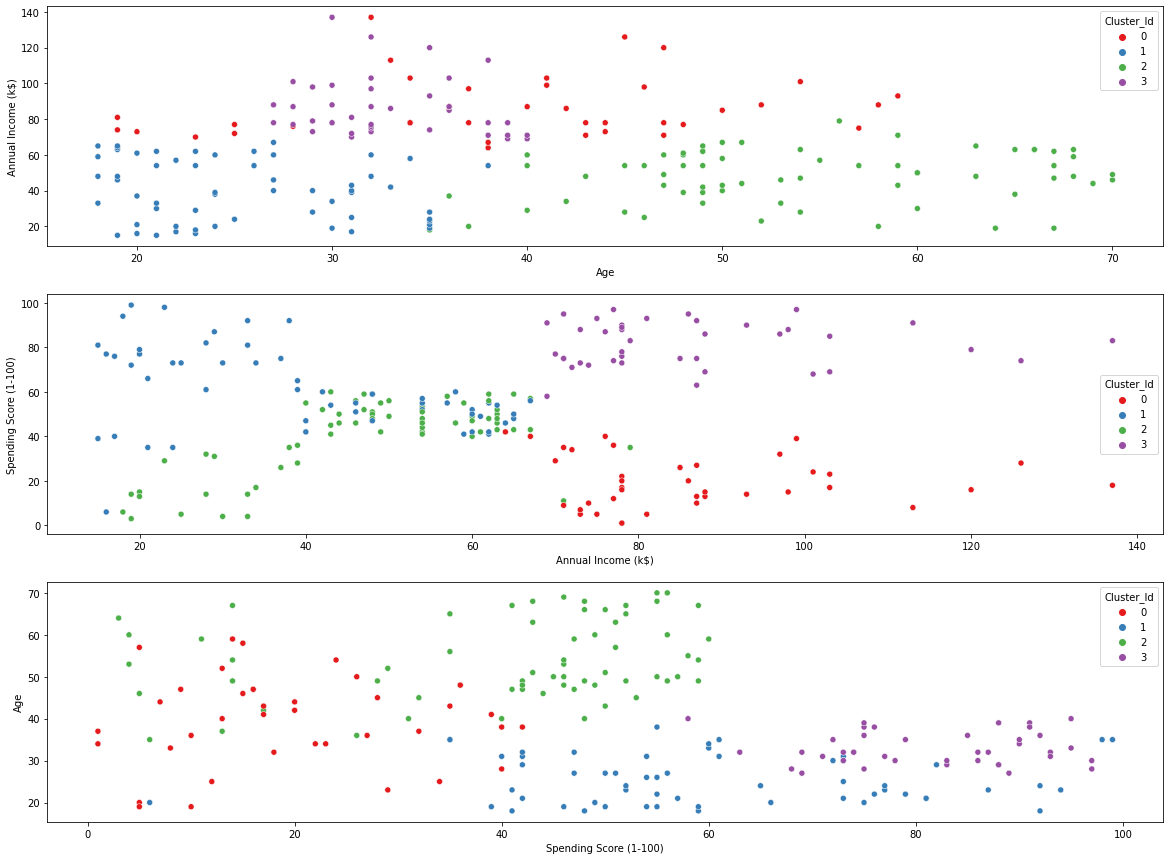

In [89]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',hue='Cluster_Id',data = mall_d,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue='Cluster_Id', data = mall_d,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Age',hue='Cluster_Id',data= mall_d,legend='full',palette="Set1")
plt.show()

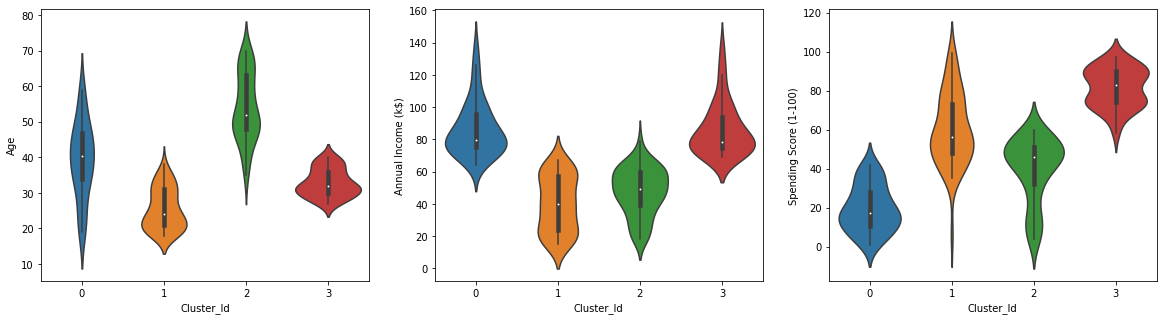

In [90]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Cluster_Id', y = 'Age', data = mall_d,ax=axes[0])
sns.violinplot(x = 'Cluster_Id', y = 'Annual Income (k$)', data = mall_d,ax=axes[1])
sns.violinplot(x = 'Cluster_Id', y = 'Spending Score (1-100)', data=mall_d,ax=axes[2])
plt.show()

In [91]:
mall_d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [92]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


# Drawing Inferences after clustering

Cluster 0 are those people whose

- Avg Age : 40
- Avg Annual Income (k$) : 86.5k
- Avg Spending Score (1-100) : 19

We can label them Low Spender

In [93]:
group_0= mall_d[mall_d['Cluster_Id']==0]
group_0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
112,113,Female,38,64,42,0
121,122,Female,38,67,40,0
124,125,Female,23,70,29,0
126,127,Male,43,71,35,0
130,131,Male,47,71,9,0


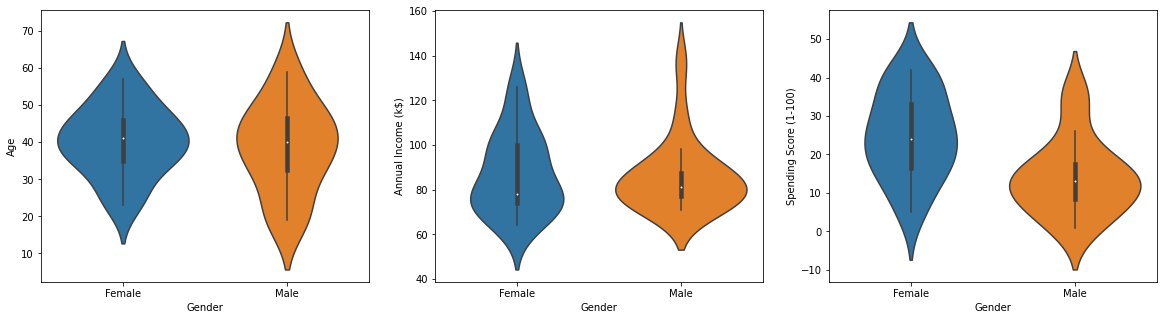

In [94]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_0,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_0,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_0,ax=axes[2])
plt.show()

- Mean Age of this cluster for Male is more than Females
- Males earn more than females
- Mean Spending Score (1-100) is same for both gender 

Cluster 1  are those people whose 
- Avg Age : 25
- Avg Annual Income (k$) : 40 k
- Avg Spending Score (1-100) : 60 

We can label them Large Spender

In [95]:
group_1= mall_d[mall_d['Cluster_Id']==1]
group_1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


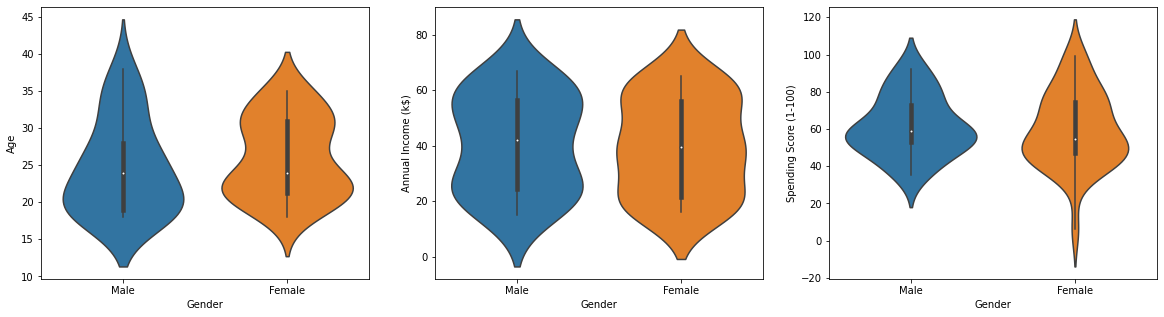

In [96]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_1,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_1,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_1,ax=axes[2])
plt.show()

- Mean Age of this cluster are same for both genders 
- Males earn more than females
- Mean Spending Score (1-100) is more for males 

Cluster 2 are those people whose 
- Avg Age : 54
- Avg Annual Income (k$) : 47.7k
- Avg Spending Score (1-100) : 40

We can label them Medium Spender

In [97]:
group_2= mall_d[mall_d['Cluster_Id']==2]
group_2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2


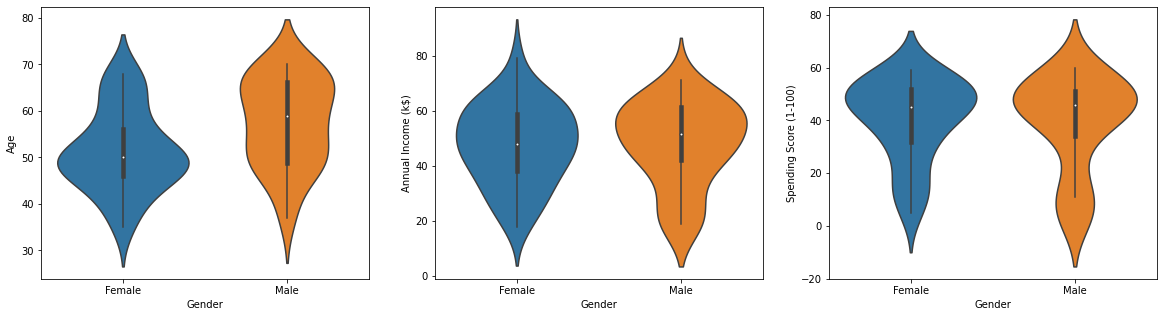

In [98]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_2,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_2,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_2,ax=axes[2])
plt.show()

- Age range for males are higher than females 
- Males earn more than females
- Mean Spending Score (1-100) is more for males 

Cluster 3 are those people whose 
- Avg Age : 32
- Avg Annual Income (k$) : 86 k
- Avg Spending Score (1-100) : 81

We can label them Extra Spender

In [99]:
group_3= mall_d[mall_d['Cluster_Id']==3]
group_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
122,123,Female,40,69,58,3
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3


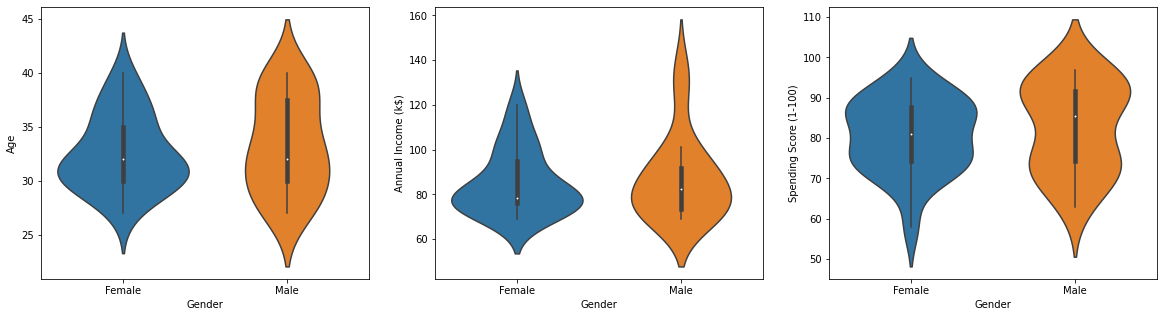

In [100]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

sns.violinplot(x = 'Gender', y = 'Age', data = group_3,ax=axes[0])
sns.violinplot(x = 'Gender', y = 'Annual Income (k$)', data = group_3,ax=axes[1])
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data=group_3,ax=axes[2])
plt.show()

- Age range for males are higher than females 
- Annual Income range for males are lower than females 
- Mean Spending Score (1-100) is more for females 

In [101]:
mall_d[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
0,39.368421,86.500000,19.578947
1,25.438596,40.000000,60.298246
2,53.984615,47.707692,39.969231
3,32.875000,86.100000,81.525000


**Final Points**

- Improve the services and provide discounts to attract Cluster 0.
- Target Cluster 1 with more offers.
- Target Cluster 2 with better employees support.
- Reward Cluster 3 people for being  loyal customer.